In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Non_parametric

### Binomial Distribution

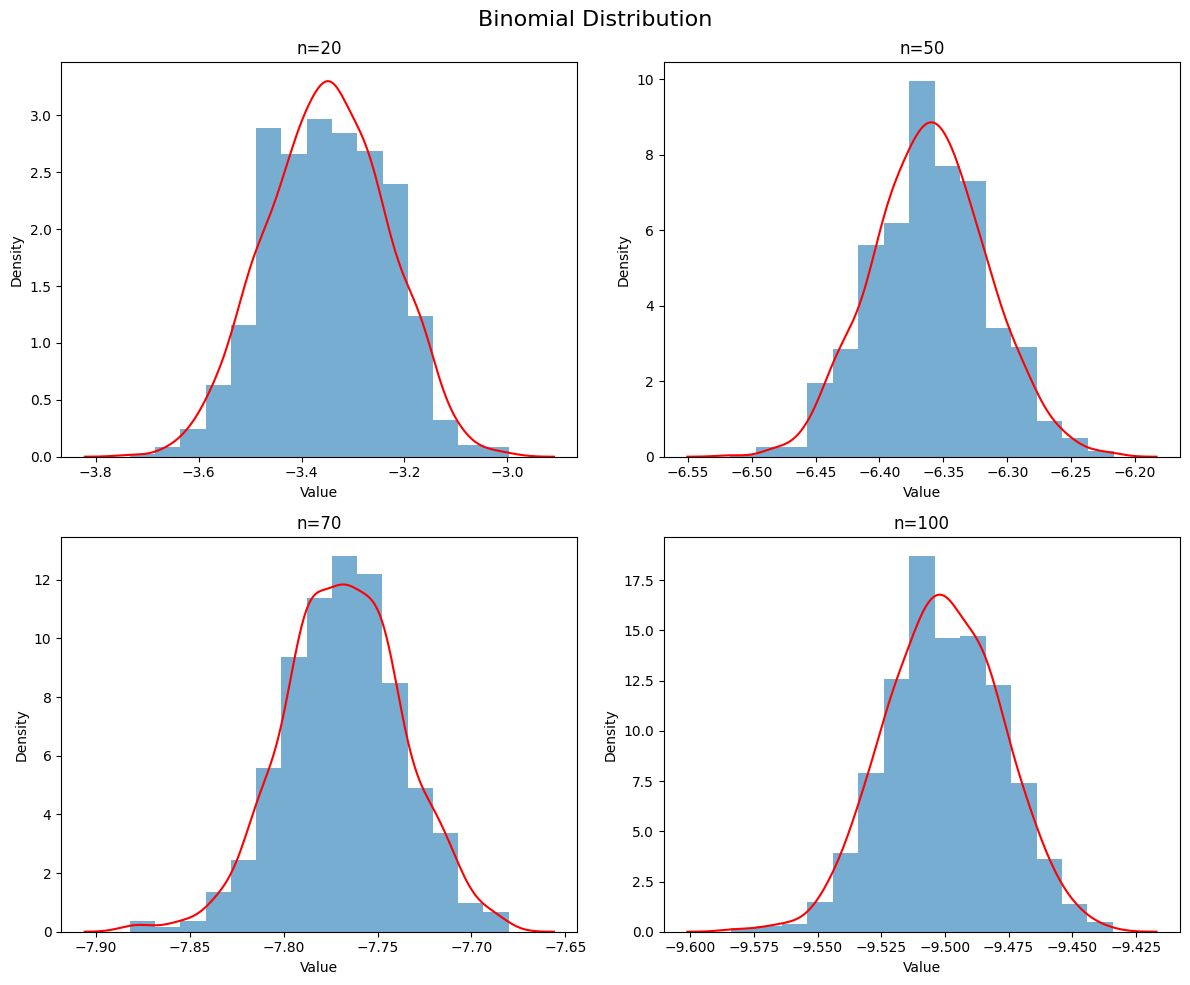

In [20]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
def func_binom(x):
    Xn_bar=[]
    for _ in range(1000):
        b=np.random.binomial(n=5,p=0.5,size=x)
        Xn_bar.append(np.mean(b))
    Xn_bar=np.array(Xn_bar)
    t=(Xn_bar-(x*0.5))/(np.sqrt(x*(0.5**2)))
    plt.hist(t,bins=15, density=True, alpha=0.6)
    sns.kdeplot(t,color='r')
    plt.title(f"n={x}")
    plt.xlabel("Value")
    plt.ylabel("Density")
   
plt.sca(axes[0, 0])
func_binom(20)

plt.sca(axes[0, 1])
func_binom(50)

plt.sca(axes[1, 0])
func_binom(70)

plt.sca(axes[1, 1])
func_binom(100)
fig.suptitle("Binomial Distribution", fontsize=16)
plt.tight_layout()
plt.show()

### Poisson Distribution

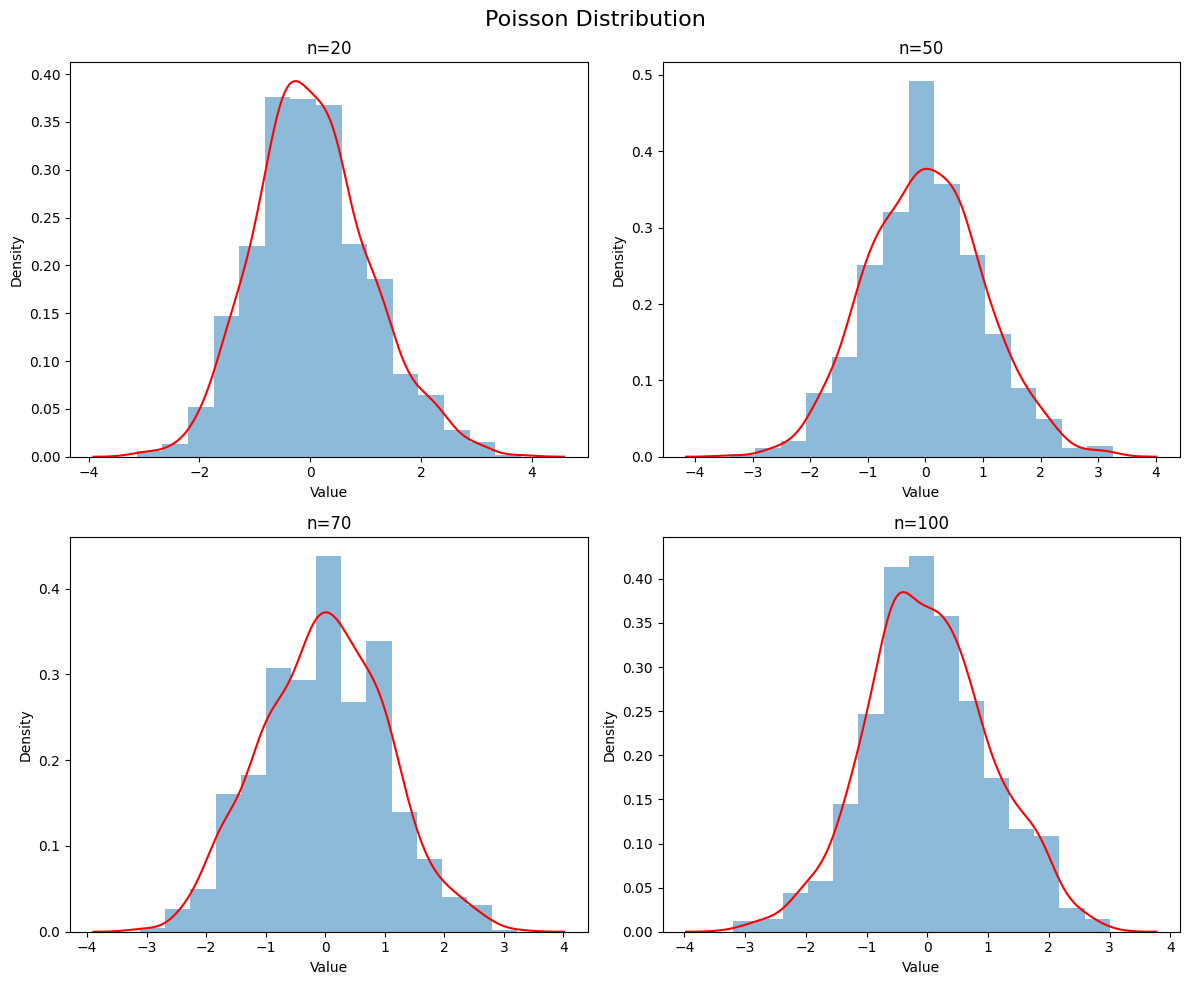

In [23]:
fig,axes = plt.subplots(2,2,figsize=(12,10))
def func_pois(n):
    Xn_bar=[]
    for i in range(1000):
        b=np.random.poisson(lam=1,size=n)
        Xn_bar.append(np.mean(b))
    Xn_bar=np.array(Xn_bar)
    t=(Xn_bar-1)/np.sqrt(1/n)
    plt.hist(t,bins=15,density=True,alpha=0.5)
    sns.kdeplot(t,c='r')
    plt.title(f"n={n}")
    plt.xlabel("Value")
    plt.ylabel("Density")

plt.sca(axes[0,0])
func_pois(20)

plt.sca(axes[0,1])
func_pois(50)

plt.sca(axes[1,0])
func_pois(70)

plt.sca(axes[1,1])
func_pois(100)

fig.suptitle("Poisson Distribution",fontsize=16)
plt.tight_layout()

### Normal Distribution

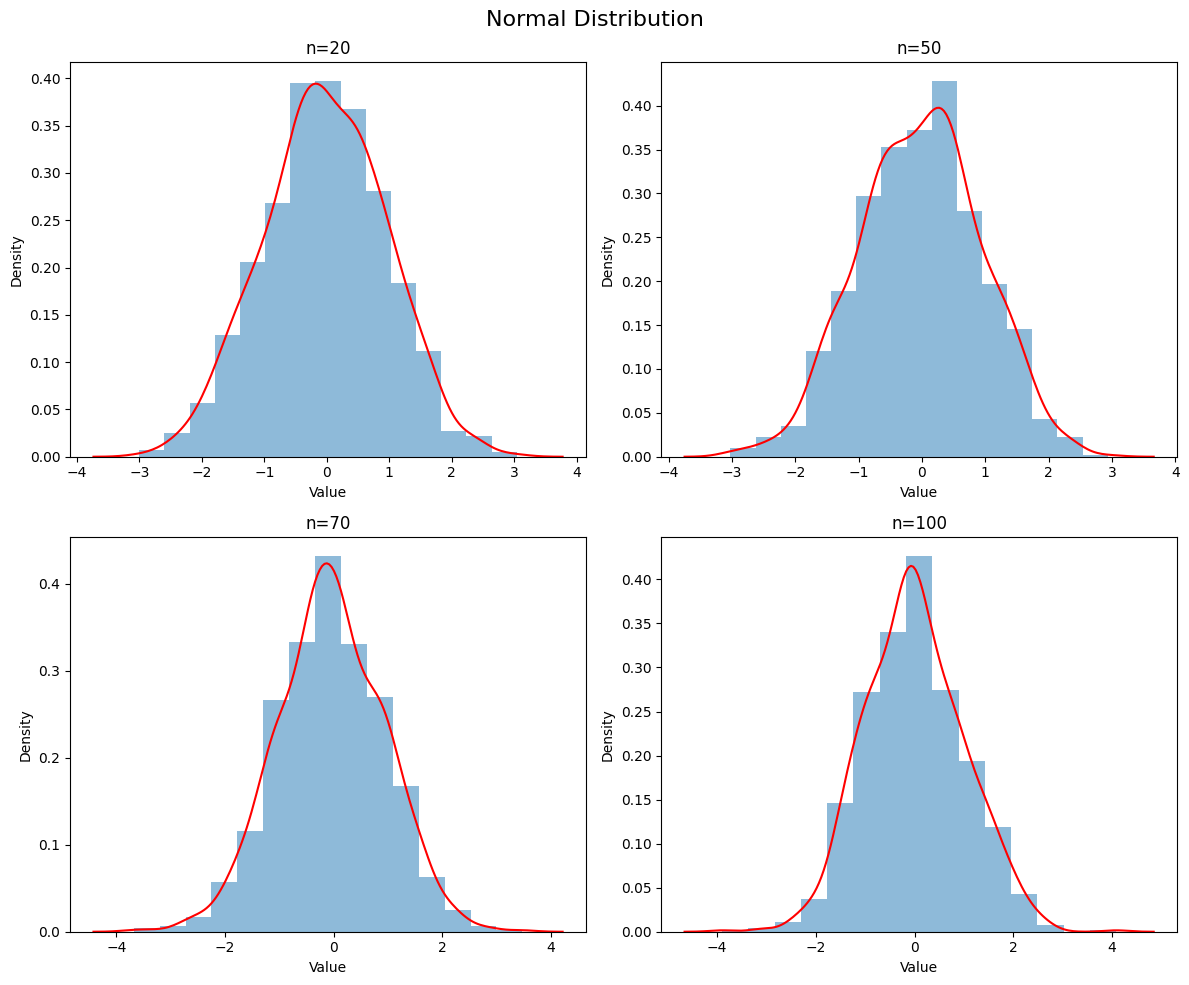

In [24]:
fig,axes = plt.subplots(2,2,figsize=(12,10))
def func_pois(n):
    Xn_bar=[]
    for i in range(1000):
        b=np.random.normal(loc=1,scale=1,size=n)
        Xn_bar.append(np.mean(b))
    Xn_bar=np.array(Xn_bar)
    t=(Xn_bar-1)/np.sqrt(1/n)
    plt.hist(t,bins=15,density=True,alpha=0.5)
    sns.kdeplot(t,c='r')
    plt.title(f"n={n}")
    plt.xlabel("Value")
    plt.ylabel("Density")

plt.sca(axes[0,0])
func_pois(20)

plt.sca(axes[0,1])
func_pois(50)

plt.sca(axes[1,0])
func_pois(70)

plt.sca(axes[1,1])
func_pois(100)

fig.suptitle("Normal Distribution",fontsize=16)
plt.tight_layout()

### Cauchy Distribution

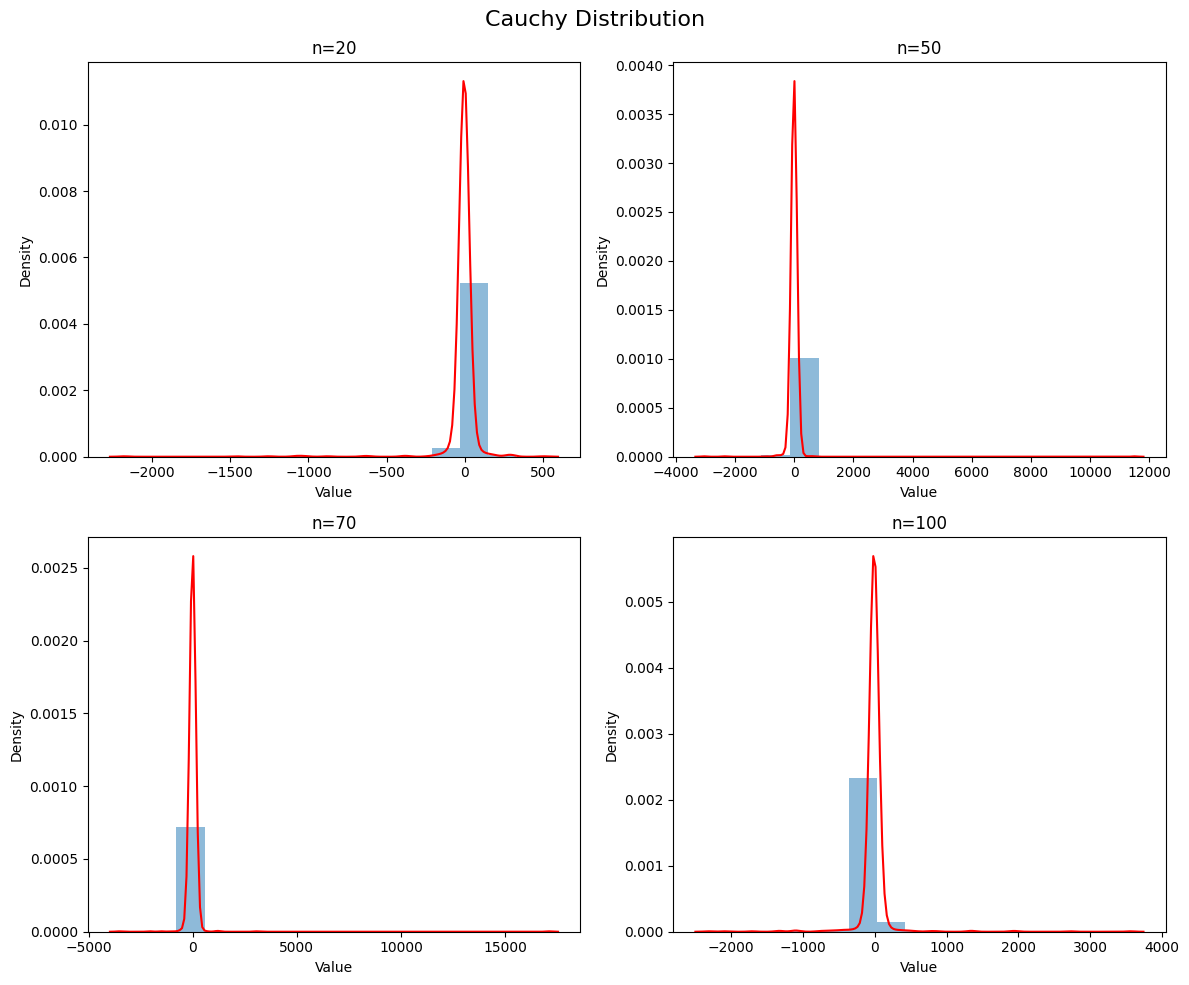

In [26]:
fig,axes = plt.subplots(2,2,figsize=(12,10))
def func_pois(n):
    Xn_bar=[]
    for i in range(1000):
        b=np.random.standard_cauchy(size=n)
        Xn_bar.append(np.mean(b))
    Xn_bar=np.array(Xn_bar)
    t=(Xn_bar-1)/np.sqrt(1/n)
    plt.hist(t,bins=15,density=True,alpha=0.5)
    sns.kdeplot(t,c='r')
    plt.title(f"n={n}")
    plt.xlabel("Value")
    plt.ylabel("Density")

plt.sca(axes[0,0])
func_pois(20)

plt.sca(axes[0,1])
func_pois(50)

plt.sca(axes[1,0])
func_pois(70)

plt.sca(axes[1,1])
func_pois(100)

fig.suptitle("Cauchy Distribution",fontsize=16)
plt.tight_layout()

# Parametric

### Zero Inflated Poisson

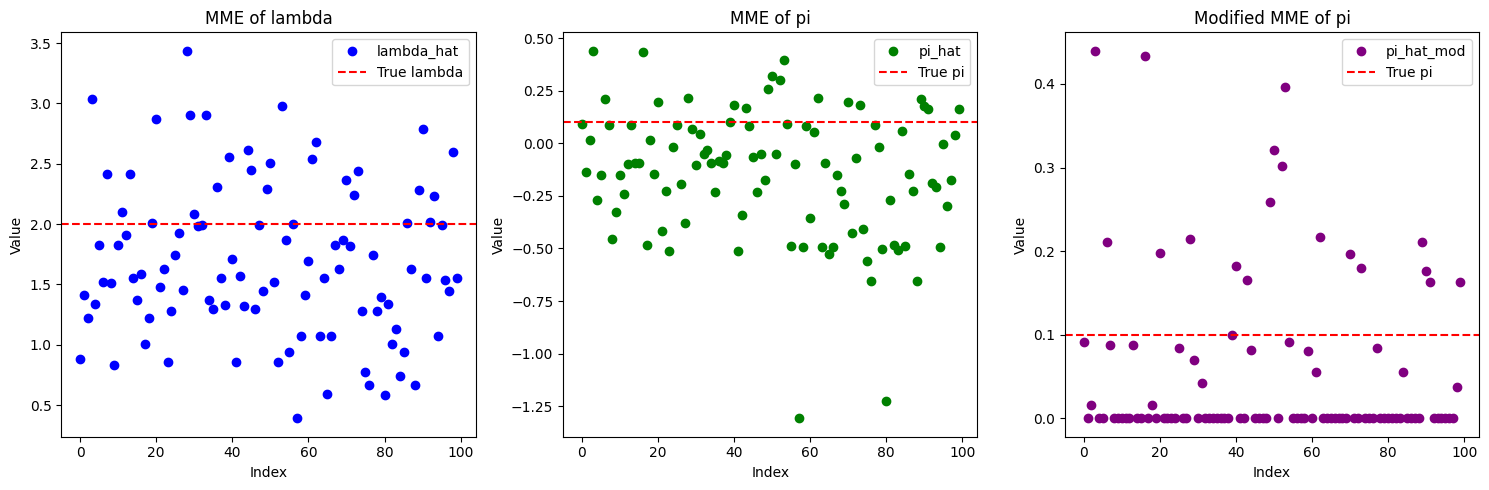

In [ ]:

def zip_func(lambda_value, pi_value, n=10, R=100):

    lambda_hat = np.zeros(R)
    pi_hat = np.zeros(R)
    pi_hat_mod = np.zeros(R)

    for k in range(R):
        y = np.zeros(n)
        for i in range(n):
            u = np.random.uniform(0, 1)
            y[i] = 0 if u < pi_value else np.random.poisson(lambda_value)
        
        s_sq = np.var(y) * (n - 1) / n  # Sample variance
        y_bar = np.mean(y)  # Sample mean
        
        # MME of lambda
        lambda_hat[k] = s_sq / y_bar + y_bar - 1
        
        # MME of pi
        pi_hat[k] = (lambda_hat[k] - y_bar) / lambda_hat[k]
        
        # Modified MME of pi
        pi_hat_mod[k] = max(0, pi_hat[k])


    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot for lambda_hat
    axes[0].plot(lambda_hat, 'o', label="lambda_hat", color='blue')
    axes[0].axhline(y=lambda_value, color='red', linestyle='--', label="True lambda")
    axes[0].set_title("MME of lambda")
    axes[0].set_xlabel("Index")
    axes[0].set_ylabel("Value")
    axes[0].legend()

    # Plot for pi_hat
    axes[1].plot(pi_hat, 'o', label="pi_hat", color='green')
    axes[1].axhline(y=pi_value, color='red', linestyle='--', label="True pi")
    axes[1].set_title("MME of pi")
    axes[1].set_xlabel("Index")
    axes[1].set_ylabel("Value")
    axes[1].legend()

    # Plot for pi_hat_mod
    axes[2].plot(pi_hat_mod, 'o', label="pi_hat_mod", color='purple')
    axes[2].axhline(y=pi_value, color='red', linestyle='--', label="True pi")
    axes[2].set_title("Modified MME of pi")
    axes[2].set_xlabel("Index")
    axes[2].set_ylabel("Value")
    axes[2].legend()


    plt.tight_layout()


    plt.show()


zip_func(2, 0.1)


### Maximum Likelihood Estimation

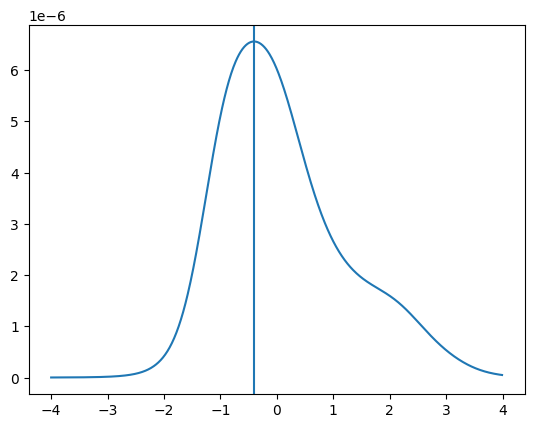

In [17]:
n=5
mu=0
sigma=1
x=np.random.standard_cauchy(size=n)

def lik(mu):
    L=np.prod(1 / (np.pi * (1 + (x - mu)**2)))
    return L

mu=np.arange(-4,4,0.01)
L=np.zeros(len(mu))
for i in range(len(mu)):
    L[i]=lik(mu[i])

plt.plot(mu,L)
mu_mle=mu[L==max(L)]
plt.axvline(mu_mle)

In [18]:
from scipy.optimize import root

def lk(mu):
    v = np.array([(x_i - mu) / (1 + (x_i - mu)**2) for x_i in x]) 
    return np.sum(v)

mu_ini=np.median(x)

result=root(lk,mu_ini,method='hybr')
mu_soln=result.x[0]

print("optimal mu:",mu_soln)

optimal mu: -0.4040881352666351


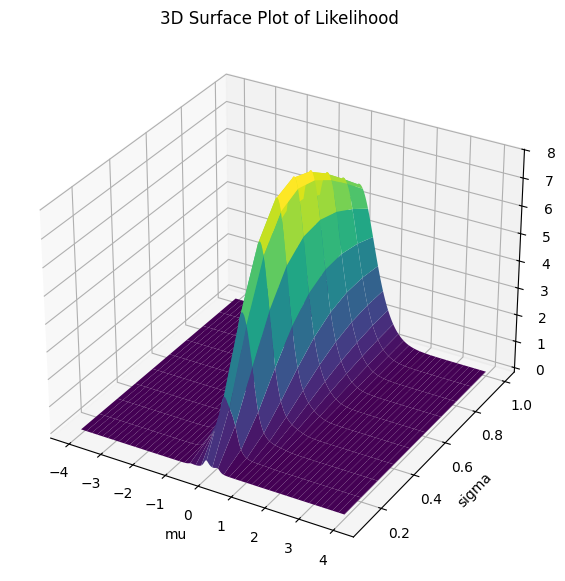

In [36]:
from scipy.stats import cauchy
n=5
mu=0
sigma=1
x=np.random.standard_cauchy(size=n)

def lik(mu,sigma):
    L=np.prod(cauchy.pdf(x=x,loc=mu,scale=sigma))
    return L

mu_values = np.arange(-4, 4.01, 0.01) 
sigma_values = np.arange(0.1, 1.01, 0.1)  
mu_grid, sigma_grid = np.meshgrid(mu_values, sigma_values)

# Compute likelihood for each combination of mu and sigma
L = np.zeros_like(mu_grid)
for i in range(sigma_grid.shape[0]):
    for j in range(mu_grid.shape[1]):
        L[i, j] = lik(mu_grid[i, j], sigma_grid[i, j])

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot( projection='3d')
ax.plot_surface(mu_grid, sigma_grid, L, cmap='viridis', edgecolor='none')


ax.set_xlabel('mu')
ax.set_ylabel('sigma')
ax.set_zlabel('Likelihood')
ax.set_title('3D Surface Plot of Likelihood')

plt.show()

In [35]:
sigma_grid.shape
len(mu_values)

801

In [32]:
mu_grid.shape

(10, 801)